In [1]:
### **Variables**

#### 1. X
#### 2. Y
#### 3. Z
#### 4. Cluster ID



In [2]:
### Objective:

#### Reduce X,Y,Z column to two column (d1, d2) using dimensionality reduction techniques (you can use any known techniques) . 

In [3]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from scipy.stats import boxcox, shapiro, probplot
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.


<h1><center><a id="2"></a> <br> Data Preprocessing</center></h1>

Download the data

In [4]:
df=pd.read_csv("../input/distance-dataset/distance_dataset.csv")

In [5]:
df.head()

,Unnamed: 0,X,Y,Z,ClusterID
0,0,5.135779,4.167542,5.787635,4
1,1,4.280721,5.770909,6.091044,4
2,2,8.329098,7.540436,3.247239,2
3,3,5.470224,5.069249,5.768313,4
4,4,2.381797,2.402374,3.879101,1


In [6]:
#Checking for nulls

df.isnull().sum()

Unnamed: 0    0
X             0
Y             0
Z             0
ClusterID     0
dtype: int64

In [7]:
#No nulls -great

#Checking for data types

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   X           2000 non-null   float64
 2   Y           2000 non-null   float64
 3   Z           2000 non-null   float64
 4   ClusterID   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [8]:
#Statistical summary

df.describe()

,Unnamed: 0,X,Y,Z,ClusterID
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,5.002561,5.032657,5.017639,3.000000
std,577.494589,1.935367,1.956047,1.957894,1.414567
min,0.000000,1.170533,1.350509,1.015867,1.000000
25%,499.750000,4.544975,3.704038,3.790899,2.000000
50%,999.500000,4.998504,5.081169,5.015852,3.000000
75%,1499.250000,5.457089,6.348823,6.345780,4.000000
max,1999.000000,8.983353,8.343726,8.600705,5.000000


##We can clearly see that the data is not scaled and not normally distributed. We will examine thus further ahead.

In [9]:
#Let´s convert the categorical variables to meaningful data

df.X.value_counts()

5.135779    1
8.245059    1
4.727276    1
1.399891    1
4.991283    1
           ..
7.943488    1
4.667757    1
7.761033    1
7.876075    1
4.955436    1
Name: X, Length: 2000, dtype: int64

In [10]:
df.X=df.X.map({3:'Other',2:'Lisbon',1:'Oporto'})

In [11]:
df.Y.value_counts()

4.167542    1
8.023461    1
4.903130    1
2.613503    1
5.895358    1
           ..
7.822768    1
5.740336    1
7.902345    1
7.915457    1
5.270550    1
Name: Y, Length: 2000, dtype: int64

In [12]:
df.Y=df.Y.map({1:'Horeca',2:'Retail'})

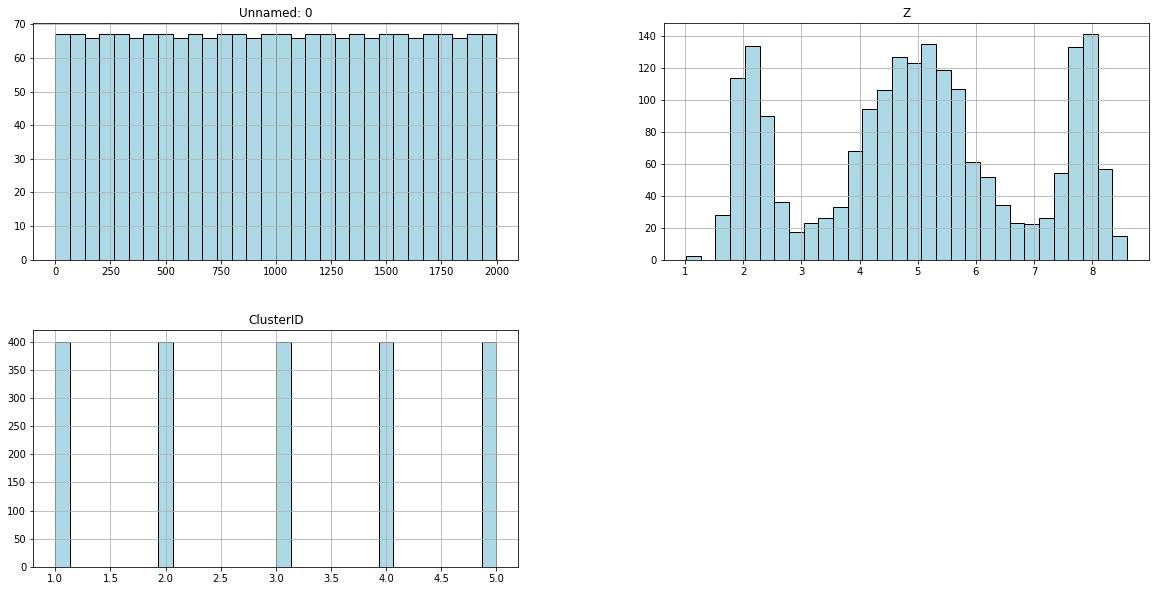

In [13]:
#Distribution of numeric variables

df.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

In [14]:
##susceptible to influential outlying values - they can strongly bias the centroids estimation. 
##In a situation like ##this K-Medians might be advisable. However data might be transformed also. 
##Here we will deploy the Box-Cox method. It ##can be implemented via ScikitLearn PowerTransformer() 
##function or with the help of box-cox from Scipy Stats library. ##We will choose the second option.

In [1]:
#Now the data resembles more the normal distribution

df.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

NameError: name 'df' is not defined

In [ ]:
##Also we need to scale the data so the distance analysis across dimensions won't be biased. KMeans performs the 
##analysis on the same scale between variables and therefore unscaled data will lead to biased learning. 
 

In [ ]:
norm=data.iloc[:,2:] #Numerical data

scaler=MinMaxScaler()
columns=data.columns[2:]
norm=scaler.fit_transform(data.iloc[:,2:]) #Only numeric variables
norm=pd.DataFrame(norm, columns=columns)

plt.figure(figsize=(10,7))
sns.boxplot(data=norm)
plt.show()

In [ ]:
##As already mentioned may negatively affect the calculation of cluster centers as individual outliers may have a 
##lot of weight in determing cluster means. Therefore we will move the outliers to 1.5 of Interquartile range 
##from 1st or 3rd quartile.

In [ ]:
for i in norm.columns:
    iqr=np.percentile(norm[i], 75)-np.percentile(norm[i], 25)
    per75=np.percentile(norm[i], 75)
    per25=np.percentile(norm[i], 25)
    norm[i]=np.where(norm[i]>per75+1.5*iqr, per75+1.5*iqr,norm[i] )
    norm[i]=np.where(norm[i]<per25-1.5*iqr, per25-1.5*iqr,norm[i] )

In [ ]:
#Now we don´t have outliers

plt.figure(figsize=(15,10))
sns.boxplot(data=norm)
plt.show()

In [ ]:
#Let´s also check for normality of the numeric variables now. However it is not a required assumptions 
#of KMeans but can produce better results. Shapiro Wilks test may be employed. 
#The null hypothesis is that the data is normal.



normality=pd.DataFrame(index=['p-value', 'test-statistic'])
for i in norm.columns:
    normality[i]=shapiro(norm[i])
    
normality.T    

In [ ]:
#We can also plot the normality via que quantile quantile plots from scipy statistical library.

plt.figure(figsize=(15,15))
for i,var in enumerate(norm.columns):
    plt.subplot(3,3,i+1)
    probplot(norm[var], plot=plt)
    plt.title(f'{var}')
plt.show()    

In [ ]:
##We can see that the data is not normally distributed. Additionally, we have two categorical variables, 
##Region and Channel that have to be recoded (One Hot Encoding) for further analysis as not to cause incorrect 
##distance estimations in distance/based algorithms. KMeans may be not stable while working on a mix of numerical 
##and categorical data. How we define distance between the values in the Region variable? The right way in my opinion 
##will be Hot Encoding

In [ ]:
data=pd.get_dummies(data=df, columns= ['X','Z'], drop_first=True)

#Uniting our categorical dummified variables with numerical normalized data.



<h1><center><a id="3"></a> <br>Modelling and Analysis</center></h1>

In [ ]:
##We are ready to perform the KMeans. However how many clusters should we choose? We have to determine the best number 
##of clusters. This can be done using "elbow trick". We will calculate WSS - Within Sum 
##of Squares (of the distances inside the cluster) for each option of number of clusters while the goal is 
##find a number of clusters which minimizes considerably the WSS. We will examine WSS between 2 and 10 clusters. 

In [ ]:
elbow_results=[]
for i in range(3,2):
    kmeans=KMeans(init='k-means++' , n_clusters=i, random_state=0)
    results=cross_validate(kmeans, data, cv=5)
    elbow_results.append(results['test_score'].mean()*-1)

In [ ]:

plt.plot(range(2,len(elbow_results)+2) , elbow_results)
plt.title('WSS - Elbow number of clusters test')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()

In [ ]:
##Plotting the elbow we can see that it's formed at value 3 on the X-axis. It means that having 3 clusters will 
##obtain the greatest proportional change in minimizing the WSS. However also number 6 presents a viable option as 
##there is a considerable change in sum of distances between 5 and 6 clusters. Adding more clusters will lower the 
##WSS but not at such considerable rate as the change between 2 and 3 clusters or between 5 or 6. Speaking in other 
##words, we are looking for the smallest angle formed by the line on the plot. Now we will try to run the algorithm 
##to group  3 clusters.

Let's visualize the clusters via pairs of variables. To do that more efficiently we need to reduce the dimensionality , so we will deploy PCA (Principal Components Analysis). First Let´s determine the best number of components to use in order to capture at least 90% of the variability of the data

In [ ]:
pca=PCA(n_components=len(df.columns)-1)

pca.fit(df.iloc[:,:-1])

pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize=(10,5))

plt.bar(range(1,2), height=np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.axhline(y=0.9, c='g', label='Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(range(1,10))
plt.legend(loc=1)
plt.show()

In [ ]:
##We can see that 90% of explained variability reached when we use 4 components. Therefore we will implement 
##dimensionality reduction to 4 components

In [ ]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(df.iloc[:,:-1])

reduced=pd.dataFrame(np.column_stack([reduced, df.clusters]), columns=['X','Y'])

sns.pairplot(reduced, hue='Cluster', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

In [ ]:
##It´s difficult to grasp the clusters like that. Let´s perform a component reduction to two variables.

In [ ]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(data.iloc[:,:-1])
reduced=pd.DataFrame(np.column_stack([reduced, df.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(10,10))
sns.scatterplot(data=reduced, hue='Cluster', x='Comp1',y='Comp2', palette='Set1')
plt.title('Clusters graphical Representation on data reduced to two dimensions',  fontsize=12)
plt.show()

In [ ]:
##Clearly the clusterization is not looking perfect on two dimensions . Since KMeans works good with spherical forms elongated cluster may present a problem for this centroid-based distance algorithm. It seems that choosing 6 clusters could provide better results.

##Let´s see the means of the original  numerical variable values for different clusters now. 

In [ ]:
means=df.iloc[:,2:].groupby('clusters').mean()


plt.figure(figsize=(10,10))
means.groupby('clusters').mean().plot(kind='bar', figsize=(15,5))
plt.title('variable means per cluster')
plt.show()

In [ ]:
hierarchy=AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward', compute_distances=True)

df['Hierarchical_clusters']=hierarchy.fit_predict(data)

Let´s plot 

In [ ]:
reduced2=pd.DataFrame(np.column_stack([reduced, df['Hierarchical_clusters']]), columns=['Comp1','Comp2','Cluster_K_Means','Hierarchical_Clusters'])

In [ ]:
plt.figure(figsize=(2,2))
sns.scatterplot(data=reduced2, hue='Hierarchical_Clusters', x='Comp1',y='Comp2', palette='Set1')
plt.title('Graphical  clusters representation of data reduced to two dimensions',  fontsize=12)
plt.show()

In [ ]:
##We can see that the clusters are now formed adequately. But what happens if we want to see what are options 
##in forming clusters, or how the observations will be divided with more or less clusters? We can plot the dendrogram,
##even before running the Hierarchical clusterization algorithm that assigns the clusters. Python has the 'dendrogram'
###and 'linkage' functions available from scipy.cluster.hierarchy which we will use.

In [ ]:


plt.figure(figsize=(10,10))
dendrogram(linkage(data ,method='ward'), truncate_mode='level', p=3 )
plt.axhline(y=4, label='threshold', color='red', lw=3)
plt.title='Dendrogram'
plt.legend(loc=6)
plt.show()

In [ ]:
#Number of observations per Cluster
print(reduced2.Hierarchical_Clusters.value_counts())